## Actividad 5.1
María Matanzo Hermoso | A01737554

Laisha Puentes Angulo | A012736397

Marco Cornejo Cornejo | A01276411

Jorge Alberto Cortes Sánchez | A01736236

Eduardo Torres Naredo | A01734935

In [511]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.formula.api import ols
from scipy import stats
from statsmodels.graphics.factorplots import interaction_plot
import textwrap


Se realiza limpieza de datos

In [512]:
df = pd.read_csv('01_DiatomInventories_GTstudentproject_B.csv')
cuantitativas= df.select_dtypes(include=["int64","float64"])
cualitativas = df.select_dtypes(include=["object"])

<Figure size 1500x800 with 0 Axes>

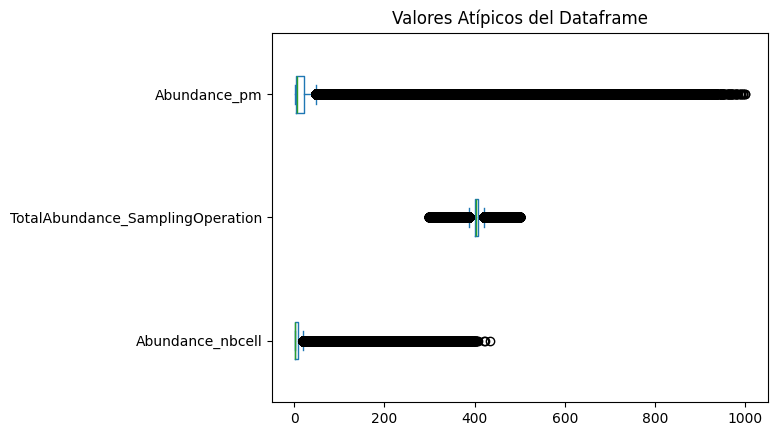

In [513]:
fig = plt.figure(figsize =(15, 8))
cuantitativas.plot(kind='box', vert=False)
plt.title("Valores Atípicos del Dataframe")
plt.show()

In [514]:
y=cuantitativas
Limite_Superior= y.mean() + 3*y.std()
Limite_Inferior= y.mean() - 3*y.std()
print("Limite superior permitido", Limite_Superior)
print("Limite inferior permitido", Limite_Inferior)

Limite superior permitido Abundance_nbcell                     94.948382
TotalAbundance_SamplingOperation    437.096025
Abundance_pm                        233.878730
dtype: float64
Limite inferior permitido Abundance_nbcell                    -71.124054
TotalAbundance_SamplingOperation    374.808697
Abundance_pm                       -175.176372
dtype: float64


In [515]:
data3= cuantitativas[(y<=Limite_Superior)&(y>=Limite_Inferior)]
data3

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [516]:
valores_nulos=data3.isnull().sum()
valores_nulos

Abundance_nbcell                    37619
TotalAbundance_SamplingOperation    34628
Abundance_pm                        37352
dtype: int64

In [517]:
data_clean=data3.copy()
data_clean=data_clean.fillna(round(data3.median(),1))
data_clean

,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
0,8.0,420.0,19.047619
1,1.0,404.0,2.475248
2,1.0,400.0,2.500000
3,2.0,400.0,5.000000
4,1.0,400.0,2.500000
...,...,...,...
1643867,1.0,412.0,2.427184
1643868,1.0,400.0,2.500000
1643869,1.0,403.0,2.481390
1643870,7.0,400.0,17.500000


In [518]:
valores_nulos=data_clean.isnull().sum()
valores_nulos

Abundance_nbcell                    0
TotalAbundance_SamplingOperation    0
Abundance_pm                        0
dtype: int64

In [519]:
Datos_limpios = pd.concat([cualitativas, data_clean], axis=1)
Datos_limpios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1643872 entries, 0 to 1643871
Data columns (total 8 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   TaxonName                         1643872 non-null  object 
 1   TaxonCode                         1643872 non-null  object 
 2   SamplingOperations_code           1643872 non-null  object 
 3   CodeSite_SamplingOperations       1643872 non-null  object 
 4   Date_SamplingOperation            1643872 non-null  object 
 5   Abundance_nbcell                  1643872 non-null  float64
 6   TotalAbundance_SamplingOperation  1643872 non-null  float64
 7   Abundance_pm                      1643872 non-null  float64
dtypes: float64(3), object(5)
memory usage: 100.3+ MB


In [520]:
# Obtengo las categorías de la variable independiente (TaxonName)
top_especies = Datos_limpios ['TaxonCode'].value_counts().head(10).index
datos_filtrados = Datos_limpios[Datos_limpios['TaxonCode'].isin(top_especies)]
grupos = pd.unique(datos_filtrados['TaxonCode'].values)
print (grupos)
print(f"\nNúmero total de grupos: {len(grupos)}")

['Achla02' 'Achmi02' 'Amppe02' 'Coceu01' 'Navcr09' 'Navpe05' 'Nitdi04'
 'Rhoab01' 'Selni01' 'Vibtr01']

Número total de grupos: 10


In [521]:
datos_filtrados.info()

<class 'pandas.core.frame.DataFrame'>
Index: 350180 entries, 32318 to 1643788
Data columns (total 8 columns):
 #   Column                            Non-Null Count   Dtype  
---  ------                            --------------   -----  
 0   TaxonName                         350180 non-null  object 
 1   TaxonCode                         350180 non-null  object 
 2   SamplingOperations_code           350180 non-null  object 
 3   CodeSite_SamplingOperations       350180 non-null  object 
 4   Date_SamplingOperation            350180 non-null  object 
 5   Abundance_nbcell                  350180 non-null  float64
 6   TotalAbundance_SamplingOperation  350180 non-null  float64
 7   Abundance_pm                      350180 non-null  float64
dtypes: float64(3), object(5)
memory usage: 24.0+ MB


In [522]:
datos_filtrados

,TaxonName,TaxonCode,SamplingOperations_code,CodeSite_SamplingOperations,Date_SamplingOperation,Abundance_nbcell,TotalAbundance_SamplingOperation,Abundance_pm
32318,Achnanthes lanceolata,Achla02,S02000008_20170703,S02000008,2017-07-03,3.0,405.0,7.407407
32319,Achnanthes lanceolata,Achla02,S02000008_20200708,S02000008,2020-07-08,3.0,400.0,7.500000
32320,Achnanthes lanceolata,Achla02,S02000010_20090721,S02000010,2009-07-21,6.0,400.0,15.000000
32321,Achnanthes lanceolata,Achla02,S02000010_20141007,S02000010,2014-10-07,2.0,400.0,5.000000
32322,Achnanthes lanceolata,Achla02,S02000010_20150811,S02000010,2015-08-11,2.0,400.0,5.000000
...,...,...,...,...,...,...,...,...
1643784,Vibrio tripunctatus,Vibtr01,S06999141_20160928,S06999141,2016-09-28,20.0,403.0,49.627792
1643785,Vibrio tripunctatus,Vibtr01,S06999179_20230628,S06999179,2023-06-28,3.0,409.0,7.334963
1643786,Vibrio tripunctatus,Vibtr01,S06999180_20160928,S06999180,2016-09-28,37.0,404.0,91.584158
1643787,Vibrio tripunctatus,Vibtr01,S06999189_20160928,S06999189,2016-09-28,13.0,403.0,32.258065


## Variable objeto Abundance_nbcell 

Anova

<Figure size 1400x600 with 0 Axes>

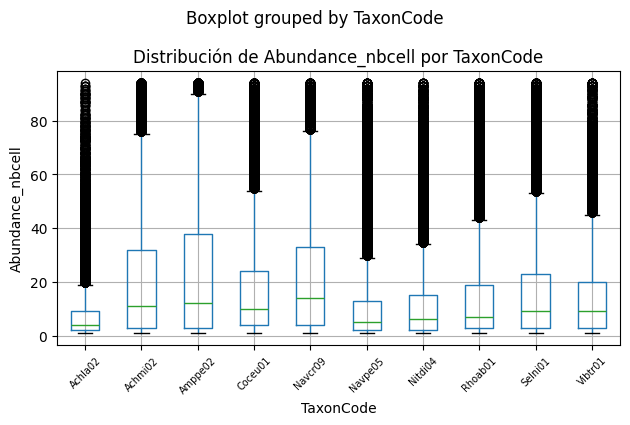

In [523]:
plt.figure(figsize=(14,6))
ax=datos_filtrados.boxplot("Abundance_nbcell", by= "TaxonCode")
plt.title("Distribución de Abundance_nbcell por TaxonCode")
plt.xlabel("TaxonCode")
plt.ylabel("Abundance_nbcell")
ax.tick_params(axis='x', rotation=45, labelsize=7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.28)  
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\2685325348.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="Abundance_nbcell", ci=95)


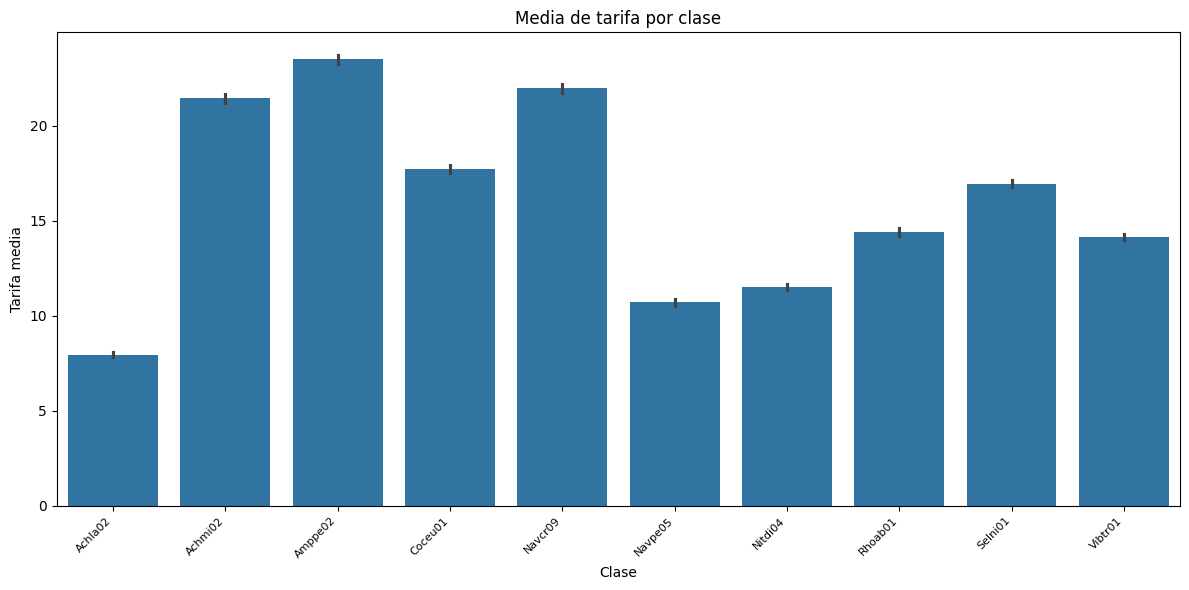

In [524]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="Abundance_nbcell", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=8)  # rota y reduce tamaño
plt.tight_layout()
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\2853649178.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped)


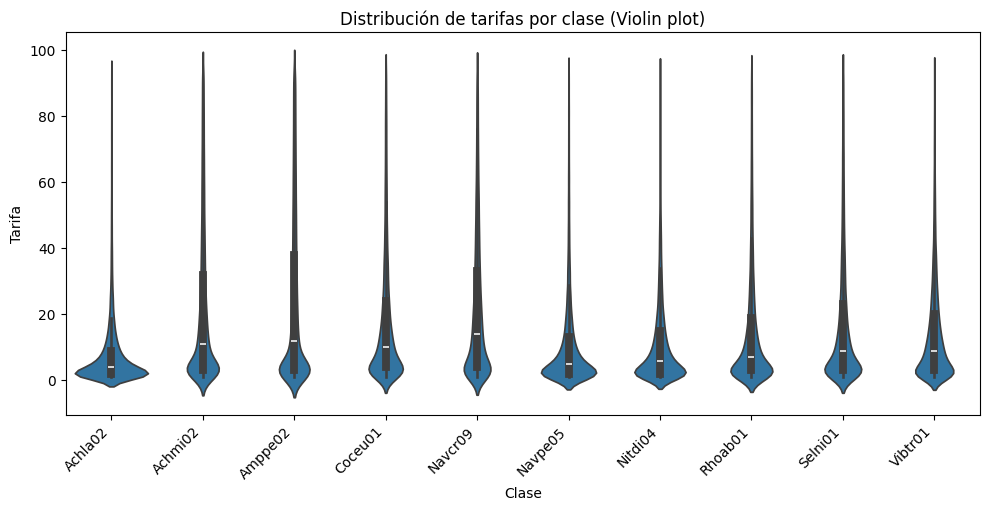

In [525]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=datos_filtrados, x="TaxonCode", y="Abundance_nbcell", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

wrapped = [ '\n'.join(textwrap.wrap(lbl.get_text(), width=8)) for lbl in ax.get_xticklabels() ]
ax.set_xticklabels(wrapped)

plt.tight_layout()
plt.subplots_adjust(bottom=0.30)
plt.show()

In [526]:
#Obtengo las categorías de la variable (Abundance_nbcell)
grupos=pd.unique(datos_filtrados['Abundance_nbcell'].values)
grupos

array([ 3.,  6.,  2.,  1.,  7.,  5.,  4., 17., 12.,  8.,  9., 18., 14.,
       30., 33., 11., 16., 36., 22., 26., 20., 10., 65., 15., 41., 13.,
       72., 19., 28., 39., 21., 31., 25., 56., 58., 78., 68., 59., 42.,
       90., 53., 24., 55., 27., 38., 46., 67., 48., 50., 23., 35., 45.,
       34., 32., 44., 62., 64., 77., 88., 61., 29., 43., 73., 70., 60.,
       40., 74., 51., 75., 63., 76., 83., 71., 54., 37., 49., 66., 57.,
       52., 82., 84., 81., 89., 79., 86., 47., 85., 87., 80., 69., 91.,
       94., 92., 93.])

In [527]:
mod= ols('Abundance_nbcell ~ TaxonCode', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df        sum_sq        mean_sq            F  PR(>F)
TaxonCode       9.0  8.325027e+06  925003.036394  2470.221085     0.0
Residual   350170.0  1.311252e+08     374.461639          NaN     NaN


In [528]:
top_especies1 = datos_filtrados['CodeSite_SamplingOperations'].value_counts().head(5).index
top_especies2 = datos_filtrados['TaxonCode'].value_counts().head(5).index
datos_filtrados2 = datos_filtrados[
    (datos_filtrados['CodeSite_SamplingOperations'].isin(top_especies1)) &
    (datos_filtrados['TaxonCode'].isin(top_especies2))
]

mod= ols('Abundance_nbcell ~ TaxonCode + CodeSite_SamplingOperations + TaxonCode:CodeSite_SamplingOperations', data=datos_filtrados2).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)
datos_filtrados2.info()


                                          df         sum_sq      mean_sq  \
TaxonCode                                4.0   20124.929104  5031.232276   
CodeSite_SamplingOperations              4.0   11088.908852  2772.227213   
TaxonCode:CodeSite_SamplingOperations   16.0   19261.815151  1203.863447   
Residual                               381.0  109785.479898   288.150866   

                                               F        PR(>F)  
TaxonCode                              17.460410  3.623178e-13  
CodeSite_SamplingOperations             9.620749  2.021794e-07  
TaxonCode:CodeSite_SamplingOperations   4.177893  1.824122e-07  
Residual                                     NaN           NaN  
<class 'pandas.core.frame.DataFrame'>
Index: 406 entries, 92662 to 1521382
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   TaxonName                         406 non-null    object

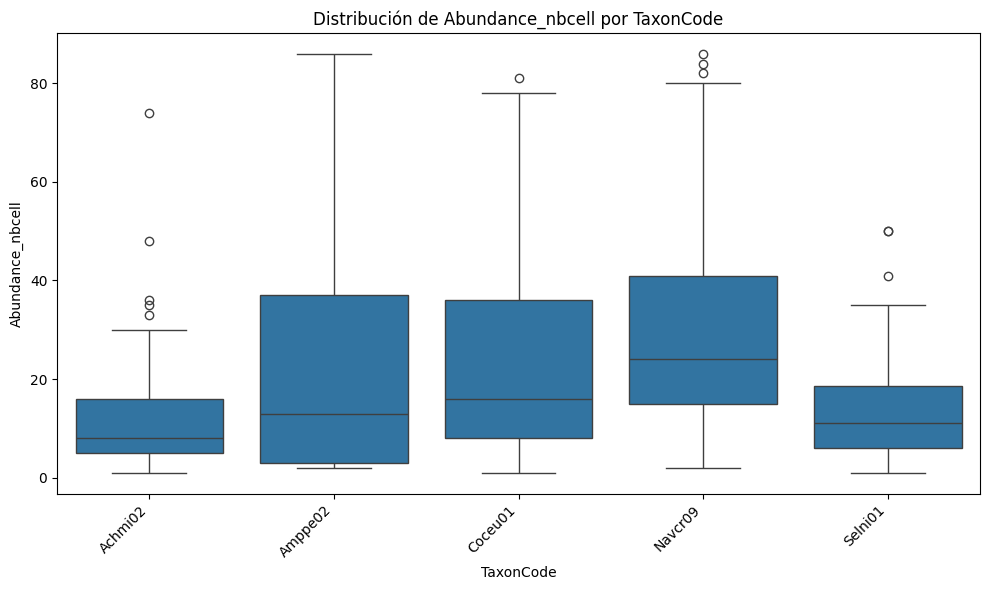

In [529]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='TaxonCode', y='Abundance_nbcell')
plt.title("Distribución de Abundance_nbcell por TaxonCode")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

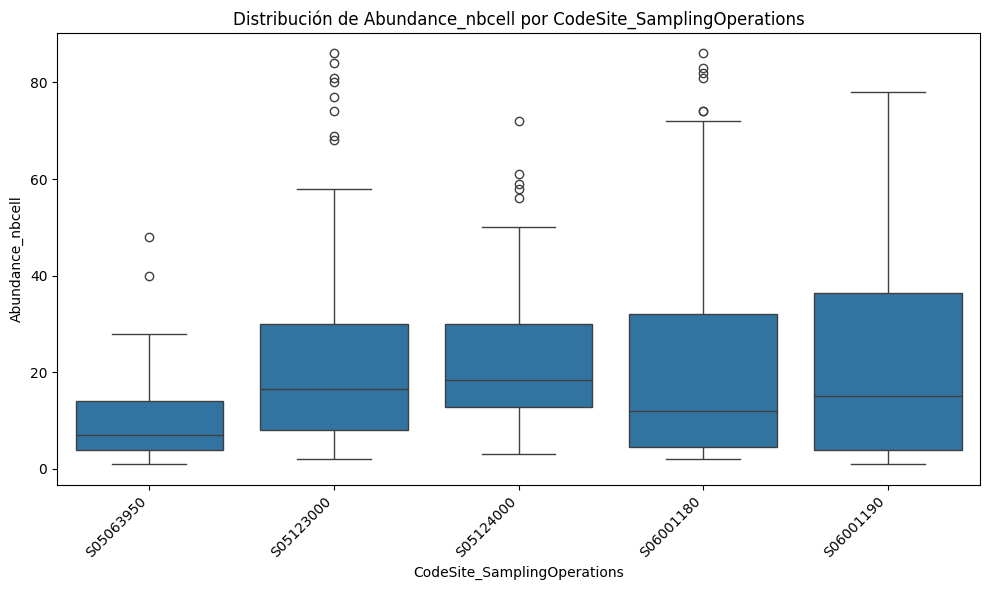

In [530]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='CodeSite_SamplingOperations', y='Abundance_nbcell')
plt.title("Distribución de Abundance_nbcell por CodeSite_SamplingOperations")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

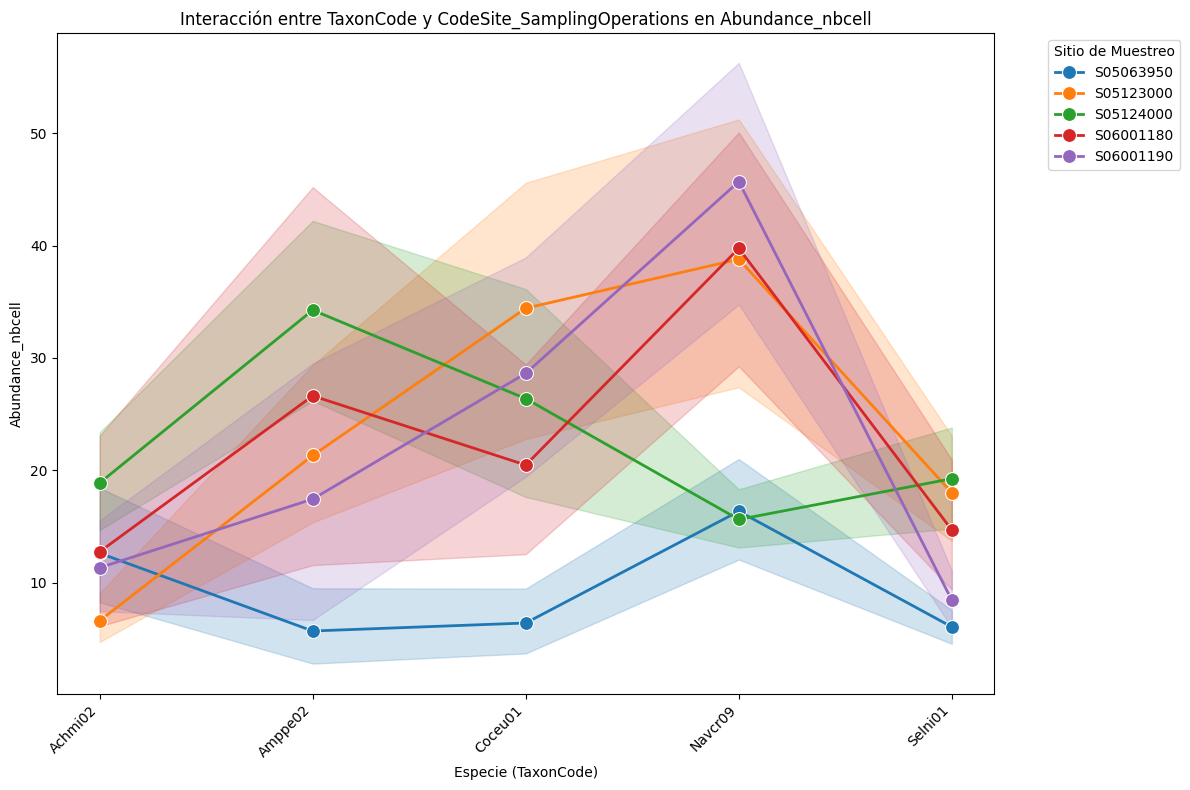

In [531]:

plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_filtrados2, 
             x='TaxonCode', 
             y='Abundance_nbcell',
             hue='CodeSite_SamplingOperations', 
             marker='o', 
             markersize=10,
             linewidth=2) 
plt.title("Interacción entre TaxonCode y CodeSite_SamplingOperations en Abundance_nbcell")
plt.xlabel("Especie (TaxonCode)")
plt.ylabel("Abundance_nbcell")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

## Variable objeto TotalAbundance_SamplingOperation

Anova

<Figure size 1400x600 with 0 Axes>

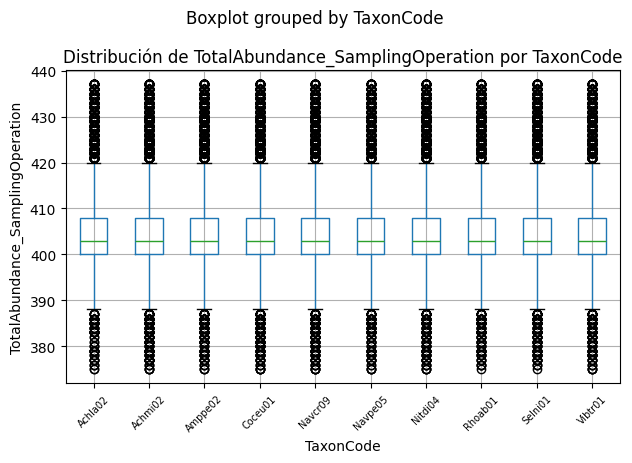

In [532]:
plt.figure(figsize=(14,6))
ax=datos_filtrados.boxplot("TotalAbundance_SamplingOperation", by= "TaxonCode")
plt.title("Distribución de TotalAbundance_SamplingOperation por TaxonCode")
plt.xlabel("TaxonCode")
plt.ylabel("TotalAbundance_SamplingOperation")
ax.tick_params(axis='x', rotation=45, labelsize=7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)  
plt.show()


C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\2009156556.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="TotalAbundance_SamplingOperation", ci=95)


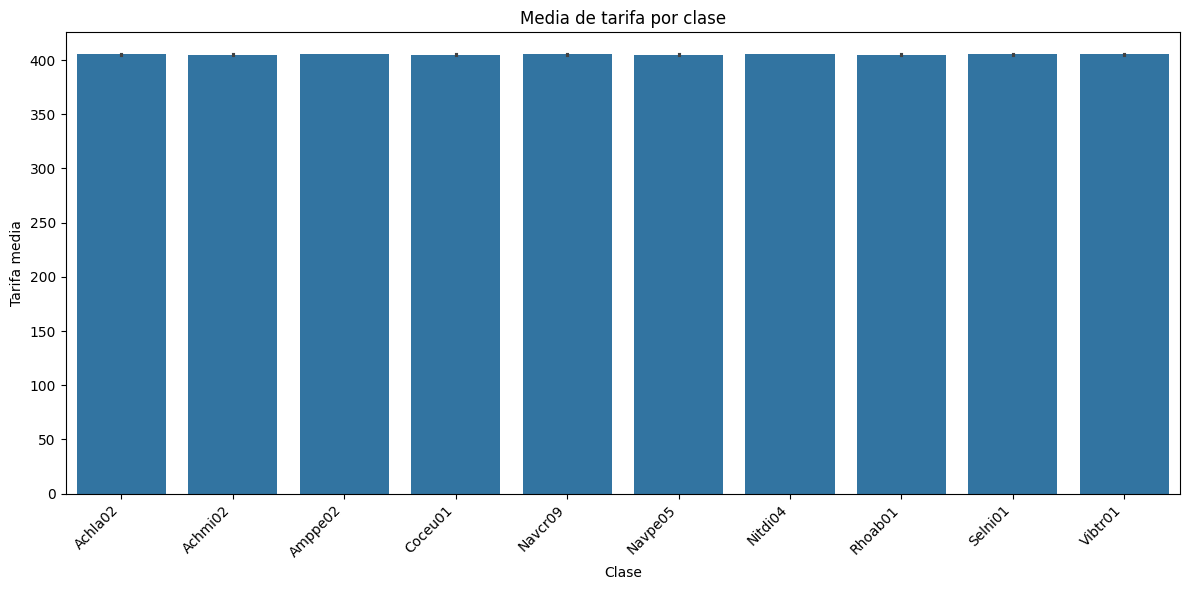

In [533]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="TotalAbundance_SamplingOperation", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # rota y reduce tamaño
plt.tight_layout()
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\1973367891.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped)


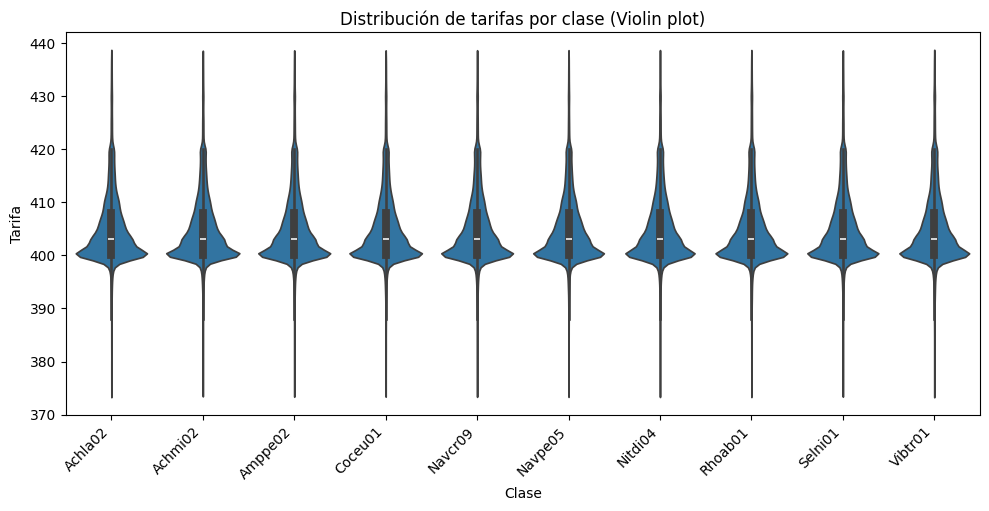

In [534]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=datos_filtrados, x="TaxonCode", y="TotalAbundance_SamplingOperation", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

wrapped = [ '\n'.join(textwrap.wrap(lbl.get_text(), width=8)) for lbl in ax.get_xticklabels() ]
ax.set_xticklabels(wrapped)

plt.tight_layout()
plt.subplots_adjust(bottom=0.30)
plt.show()

In [535]:
grupos=pd.unique(datos_filtrados['TotalAbundance_SamplingOperation'].values)
grupos

array([405., 400., 403., 401., 407., 406., 398., 412., 414., 408., 402.,
       410., 404., 411., 419., 415., 409., 417., 399., 422., 418., 396.,
       420., 416., 413., 424., 397., 434., 425., 387., 421., 395., 392.,
       393., 394., 423., 426., 430., 435., 432., 391., 428., 431., 429.,
       379., 383., 389., 427., 437., 433., 390., 385., 436., 386., 388.,
       380., 376., 384., 378., 381., 375., 377., 382.])

In [536]:
mod= ols('TotalAbundance_SamplingOperation ~ TaxonCode', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df        sum_sq     mean_sq         F    PR(>F)
TaxonCode       9.0  9.330768e+02  103.675198  2.294157  0.014313
Residual   350170.0  1.582453e+07   45.190983       NaN       NaN


In [537]:
mod= ols('TotalAbundance_SamplingOperation ~ TaxonCode + CodeSite_SamplingOperations + TaxonCode:CodeSite_SamplingOperations', data=datos_filtrados2).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                          df        sum_sq     mean_sq  \
TaxonCode                                4.0      2.149702    0.537426   
CodeSite_SamplingOperations              4.0   2664.230322  666.057580   
TaxonCode:CodeSite_SamplingOperations   16.0     19.903850    1.243991   
Residual                               381.0  26476.129919   69.491155   

                                              F        PR(>F)  
TaxonCode                              0.007734  9.998810e-01  
CodeSite_SamplingOperations            9.584782  2.151388e-07  
TaxonCode:CodeSite_SamplingOperations  0.017901  1.000000e+00  
Residual                                    NaN           NaN  


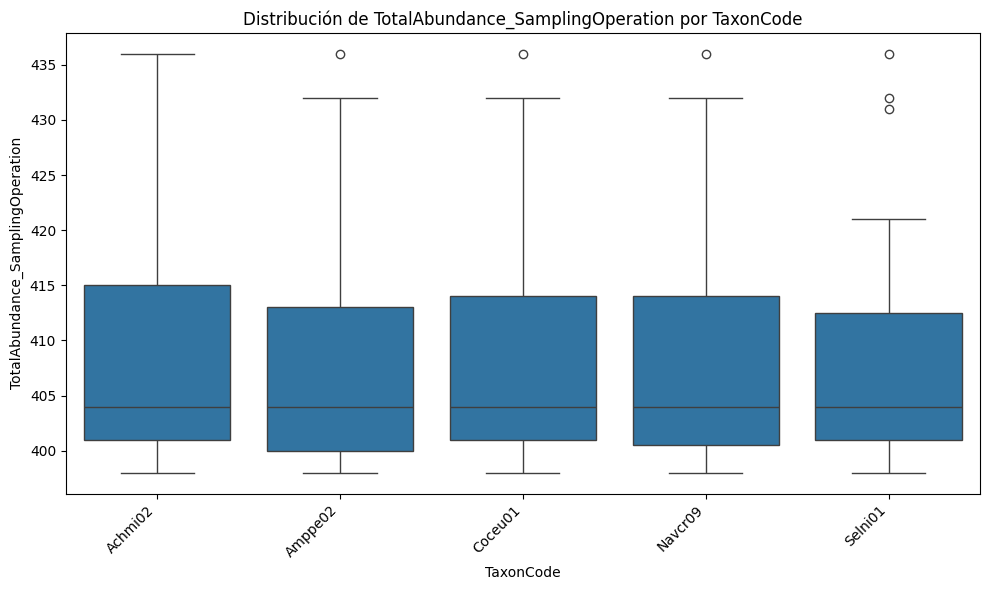

In [538]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='TaxonCode', y='TotalAbundance_SamplingOperation')
plt.title("Distribución de TotalAbundance_SamplingOperation por TaxonCode")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

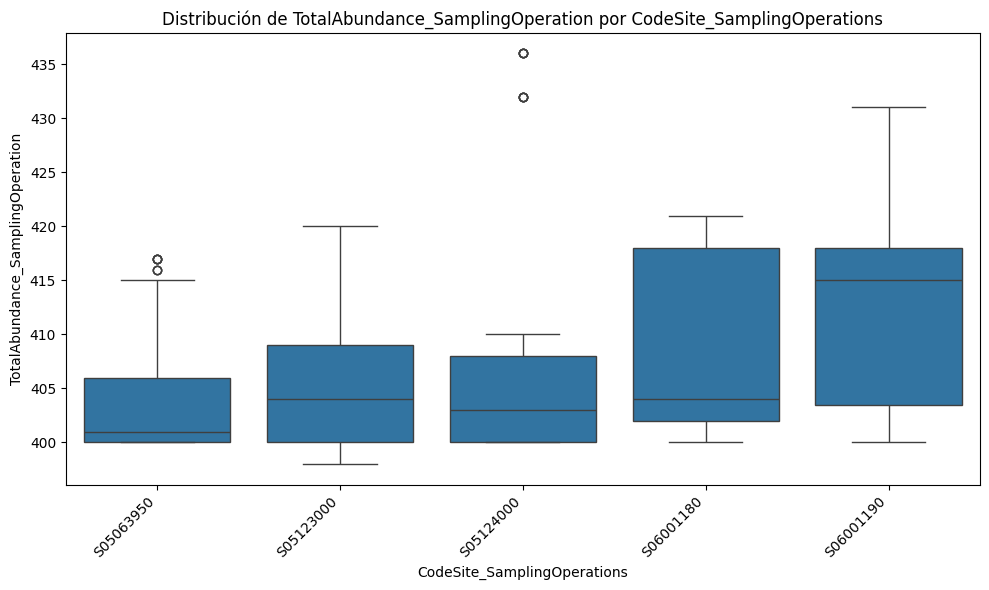

In [539]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='CodeSite_SamplingOperations', y='TotalAbundance_SamplingOperation')
plt.title("Distribución de TotalAbundance_SamplingOperation por CodeSite_SamplingOperations")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

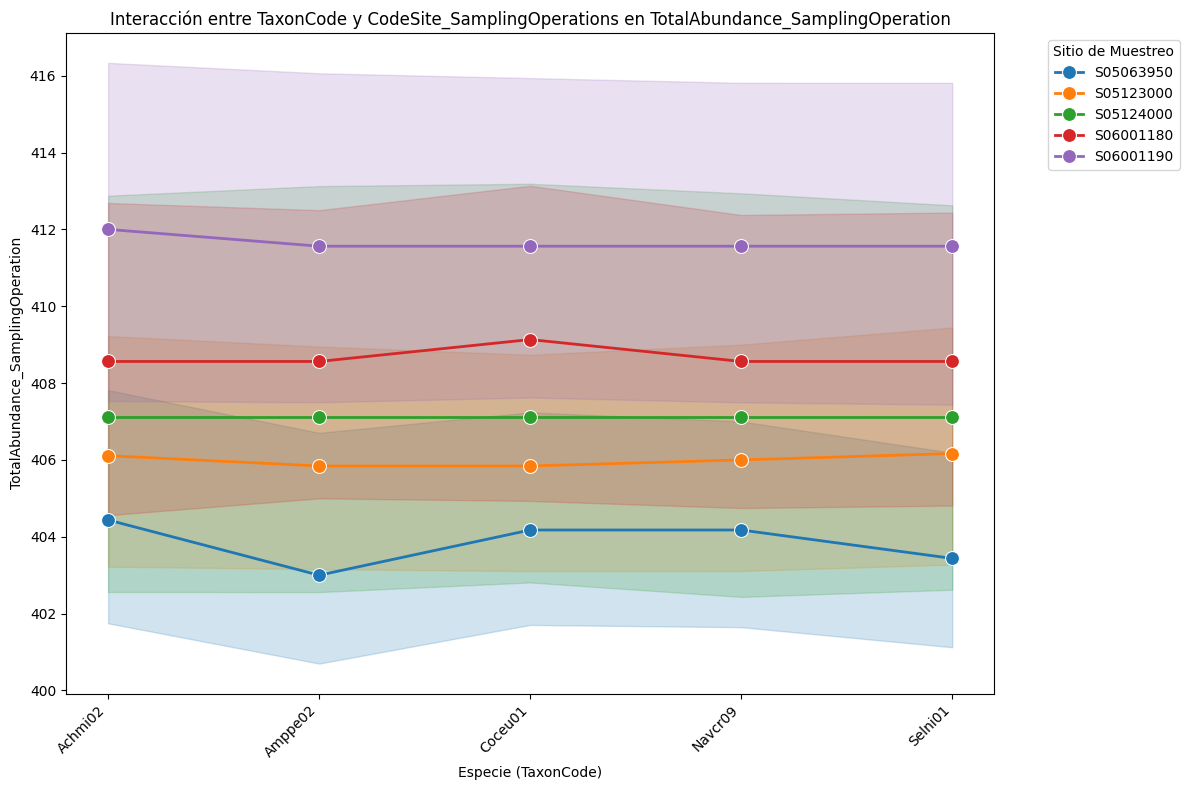

In [540]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_filtrados2, 
             x='TaxonCode', 
             y='TotalAbundance_SamplingOperation',
             hue='CodeSite_SamplingOperations', 
             marker='o', 
             markersize=10,
             linewidth=2) 
plt.title("Interacción entre TaxonCode y CodeSite_SamplingOperations en TotalAbundance_SamplingOperation")
plt.xlabel("Especie (TaxonCode)")
plt.ylabel("TotalAbundance_SamplingOperation")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()

## Variable objetivo Abundance_pm

anova

<Figure size 1400x600 with 0 Axes>

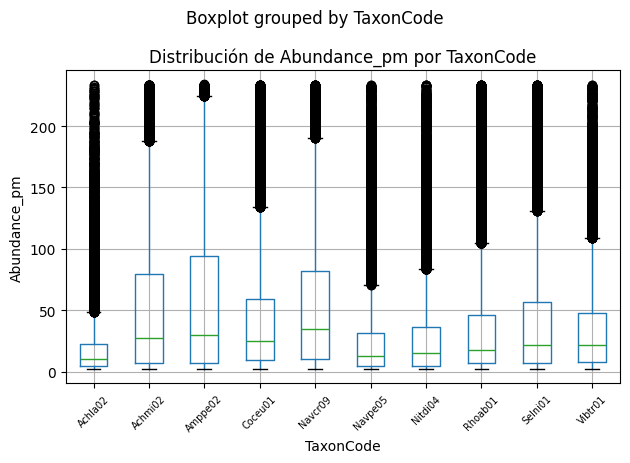

In [541]:
plt.figure(figsize=(14,6))
ax=datos_filtrados.boxplot("Abundance_pm", by= "TaxonCode")
plt.title("Distribución de Abundance_pm por TaxonCode")
plt.xlabel("TaxonCode")
plt.ylabel("Abundance_pm")
ax.tick_params(axis='x', rotation=45, labelsize=7)

plt.tight_layout()
plt.subplots_adjust(bottom=0.20)  
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\3311146778.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="Abundance_pm", ci=95)


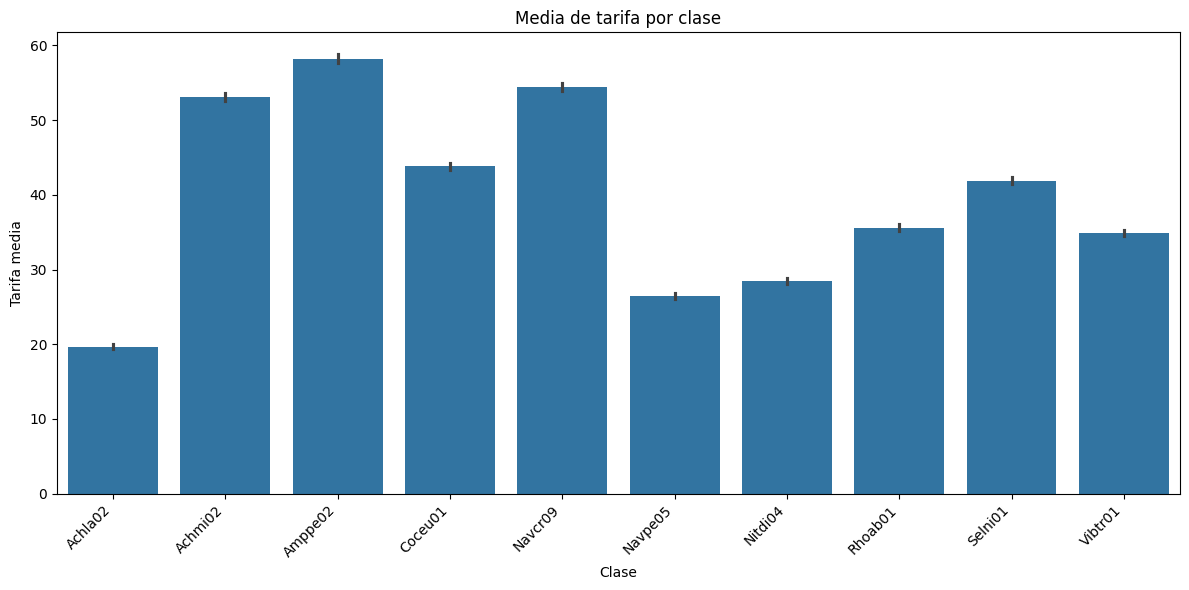

In [542]:
plt.figure(figsize=(12,6))
ax = sns.barplot(data=datos_filtrados, x="TaxonCode", y="Abundance_pm", ci=95)
plt.title("Media de tarifa por clase")
plt.ylabel("Tarifa media")
plt.xlabel("Clase")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)  # rota y reduce tamaño
plt.tight_layout()
plt.show()

C:\Users\maryk\AppData\Local\Temp\ipykernel_38964\174569896.py:10: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(wrapped)


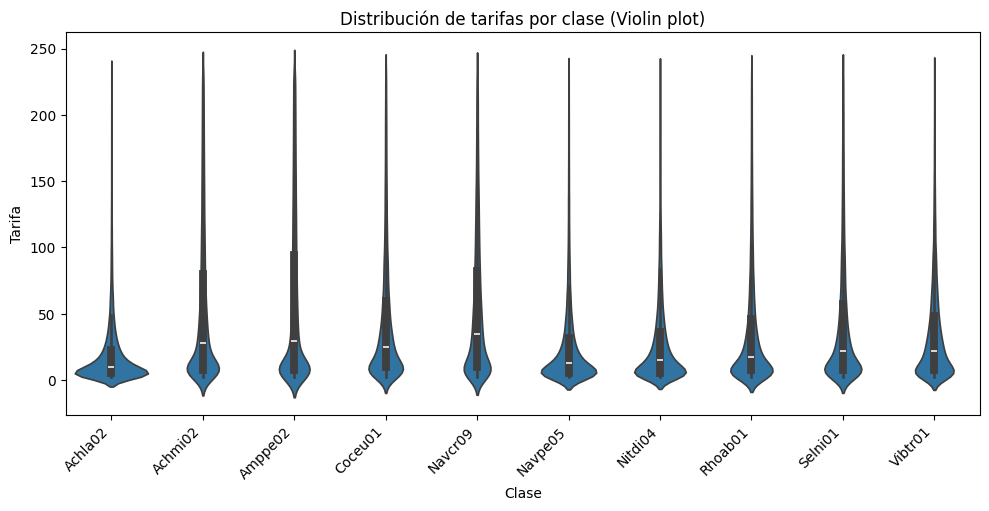

In [543]:
plt.figure(figsize=(10,6))
ax = sns.violinplot(data=datos_filtrados, x="TaxonCode", y="Abundance_pm", inner="box")
plt.title("Distribución de tarifas por clase (Violin plot)")
plt.ylabel("Tarifa")
plt.xlabel("Clase")

plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)

wrapped = [ '\n'.join(textwrap.wrap(lbl.get_text(), width=8)) for lbl in ax.get_xticklabels() ]
ax.set_xticklabels(wrapped)

plt.tight_layout()
plt.subplots_adjust(bottom=0.30)
plt.show()

In [544]:
grupos=pd.unique(datos_filtrados['Abundance_pm'].values)
grupos

array([  7.40740741,   7.5       ,  15.        , ...,  40.43126685,
        30.56768559, 150.64935065], shape=(7762,))

In [545]:
mod= ols('Abundance_pm ~ TaxonCode', data=datos_filtrados).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                 df        sum_sq       mean_sq            F  PR(>F)
TaxonCode       9.0  5.123110e+07  5.692345e+06  2484.642473     0.0
Residual   350170.0  8.022436e+08  2.291012e+03          NaN     NaN


In [546]:
mod= ols('Abundance_pm ~ TaxonCode + CodeSite_SamplingOperations + TaxonCode:CodeSite_SamplingOperations', data=datos_filtrados2).fit()
anova_table=sm.stats.anova_lm(mod, typ=1)
print (anova_table)

                                          df         sum_sq       mean_sq  \
TaxonCode                                4.0  119354.756566  29838.689142   
CodeSite_SamplingOperations              4.0   66855.735654  16713.933913   
TaxonCode:CodeSite_SamplingOperations   16.0  114747.111693   7171.694481   
Residual                               381.0  656307.650948   1722.592260   

                                               F        PR(>F)  
TaxonCode                              17.321969  4.549308e-13  
CodeSite_SamplingOperations             9.702780  1.754748e-07  
TaxonCode:CodeSite_SamplingOperations   4.163315  1.974593e-07  
Residual                                     NaN           NaN  


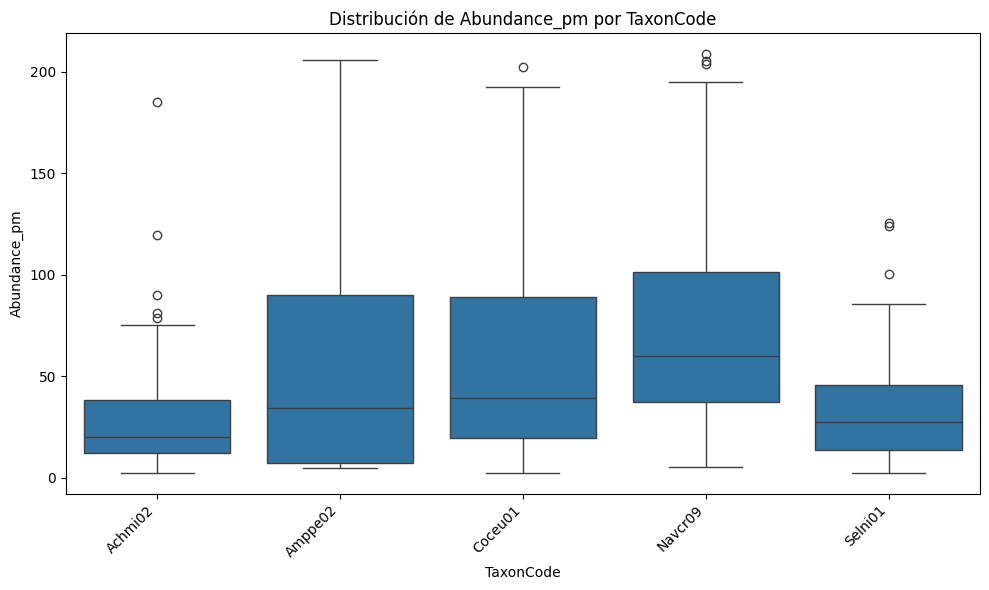

In [547]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='TaxonCode', y='Abundance_pm')
plt.title("Distribución de Abundance_pm por TaxonCode")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

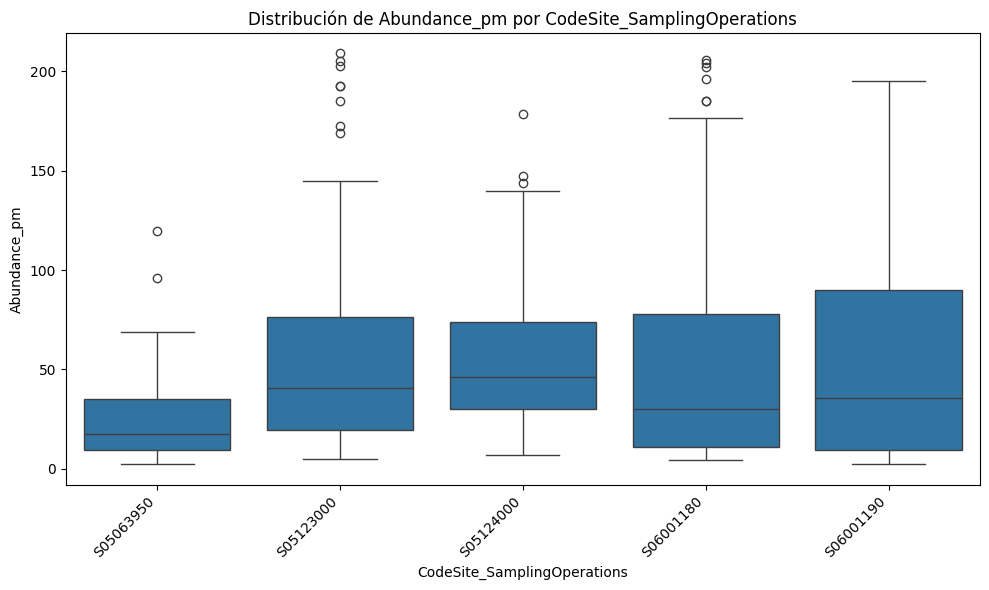

In [548]:
plt.figure(figsize=(10,6))
ax = sns.boxplot(data=datos_filtrados2, x='CodeSite_SamplingOperations', y='Abundance_pm')
plt.title("Distribución de Abundance_pm por CodeSite_SamplingOperations")
plt.setp(ax.get_xticklabels(), rotation=45, ha='right', fontsize=10)
plt.tight_layout()
plt.show()

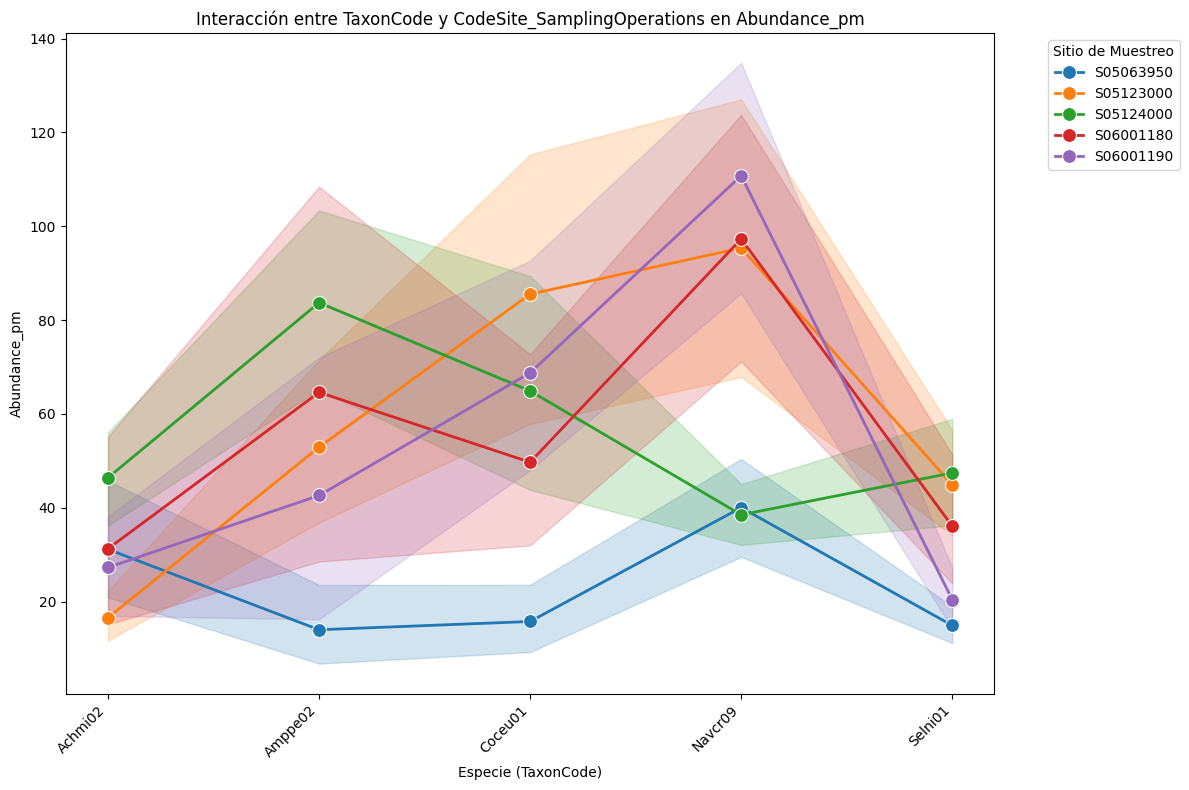

In [549]:
plt.figure(figsize=(12, 8))
sns.lineplot(data=datos_filtrados2, 
             x='TaxonCode', 
             y='Abundance_pm',
             hue='CodeSite_SamplingOperations', 
             marker='o', 
             markersize=10,
             linewidth=2) 
plt.title("Interacción entre TaxonCode y CodeSite_SamplingOperations en Abundance_pm")
plt.xlabel("Especie (TaxonCode)")
plt.ylabel("Abundance_pm")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Sitio de Muestreo', bbox_to_anchor=(1.05, 1), loc='upper left') 
plt.tight_layout()
plt.show()